In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
#1.
df=pd.read_csv("tested.csv")
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [17]:
#2.
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [19]:
#3.
df['Age_backup']=df['Age']
df['Age_ffill']=df['Age'].ffill()
df['Age_bfill']=df['Age'].bfill()
df[['Age','Age_ffill','Age_bfill']].head(10)

,Age,Age_ffill,Age_bfill
0,34.5,34.5,34.5
1,47.0,47.0,47.0
2,62.0,62.0,62.0
3,27.0,27.0,27.0
4,22.0,22.0,22.0
5,14.0,14.0,14.0
6,30.0,30.0,30.0
7,26.0,26.0,26.0
8,18.0,18.0,18.0
9,21.0,21.0,21.0


In [20]:
#4.
missing_cabin_idx=df[df['Cabin'].isna()].index[:5]
df.loc[missing_cabin_idx, 'Cabin']="Unkown"
df.loc[missing_cabin_idx, ['Name','Cabin']]

,Name,Cabin
0,"Kelly, Mr. James",Unkown
1,"Wilkes, Mrs. James (Ellen Needs)",Unkown
2,"Myles, Mr. Thomas Francis",Unkown
3,"Wirz, Mr. Albert",Unkown
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Unkown


In [21]:
#5.
print("Duplicate rows:",df.duplicated().sum())
df=df.drop_duplicates()
print("After removal,duplicate rows:",df.duplicated().sum())

Duplicate rows: 0
After removal,duplicate rows: 0


In [22]:
#6.
le=LabelEncoder()
df['Sex_encoded']=le.fit_transform(df['Sex'])
df[['Sex','Sex_encoded']].head()

,Sex,Sex_encoded
0,male,1
1,female,0
2,male,1
3,male,1
4,female,0


In [23]:
#7.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
df[['Fare', 'Fare_scaled']].head()



,Fare,Fare_scaled
0,7.8292,-0.497811
1,7.0000,-0.512660
2,9.6875,-0.464532
3,8.6625,-0.482888
4,12.2875,-0.417971


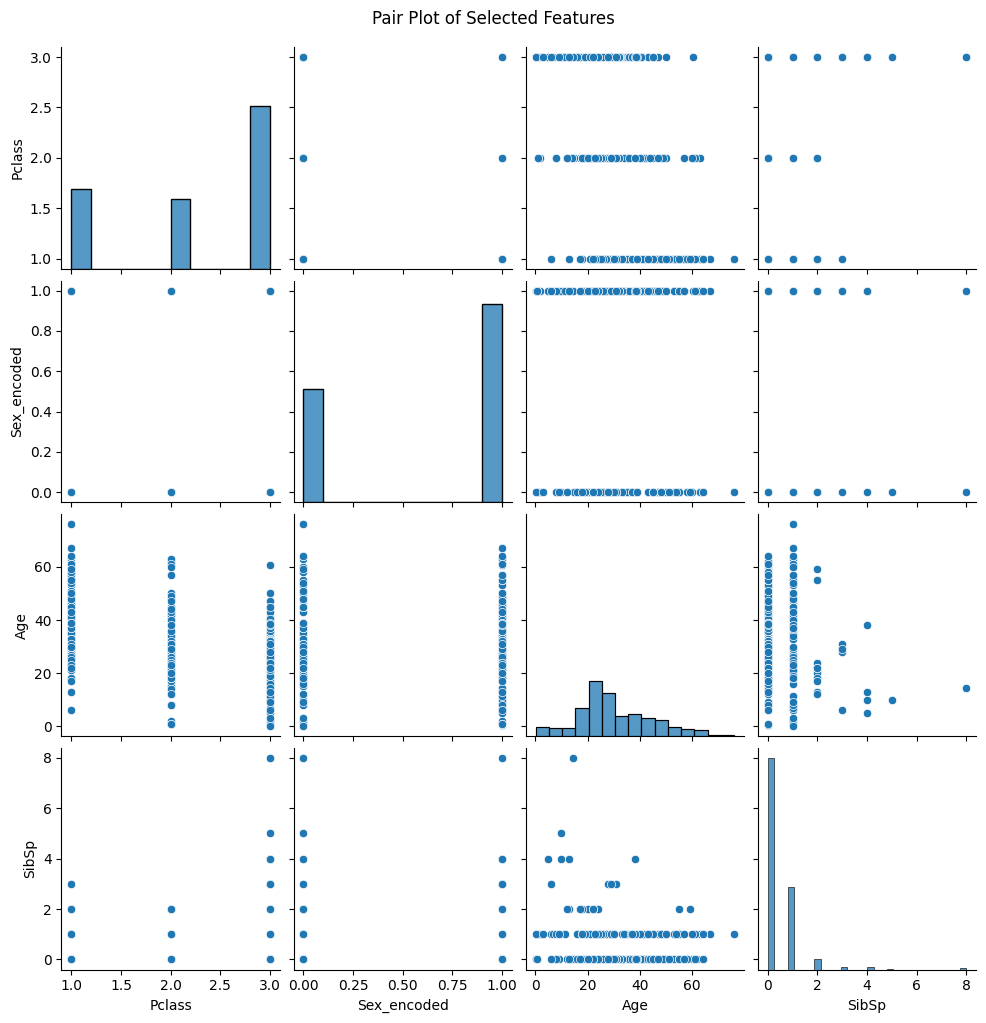

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp']
sns.pairplot(df[selected_features])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


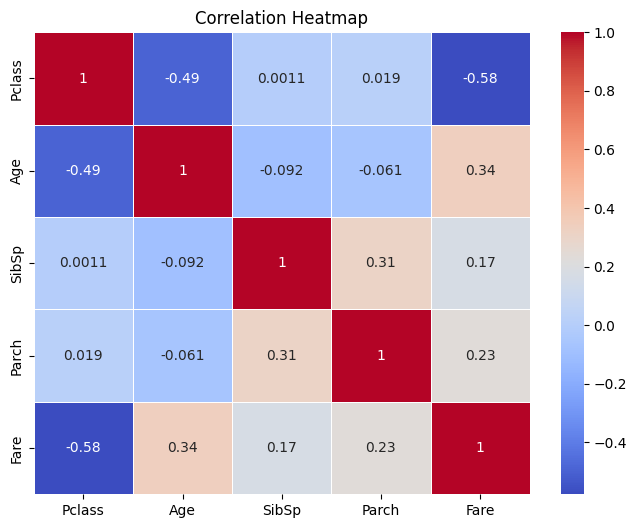

In [25]:
corr_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = df[corr_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
